In [1]:
suppressMessages(require(ggplot2))
suppressMessages(require(data.table))
suppressMessages(require(gplots))
suppressMessages(require(Seurat))
suppressMessages(require(Matrix))
source("VDJ_ploting_suite.R")
source("VDJ_function_pack.R")

In [2]:
load("180607_RUVscale.Rdata")

In [3]:
ls()

[1] "BCR_annoation"         "BCR_annoation_w"       "cell_assignment_gps"  
 [4] "cellcycle_assigning"   "cellTypeDF_processing" "Exp_Seurat"           
 [7] "Fill_Seurat_DR"        "filter_ident"          "filter_metadata"      
[10] "gp_name_replacing"     "HVG"                   "patient_type"         
[13] "plotByBTType"          "plotByCellcycle"       "plotByCellType"       
[16] "plotByCellType_1by1"   "plotByCluster"         "plotByCluster_1by1"   
[19] "plotByDisease"         "plotByPatient"         "plotBySampleID"       
[22] "plotByTissue"          "sample_list"           "Subsample_by_group"   
[25] "t2g"                   "taggene_hk"            "taggene_mt"           
[28] "TCR_annoation"         "TCR_annoation_w"       "tissue_type"          
[31] "value_spliting"

## T cells clonality

In [ ]:
# it seems that including the non-productive one is not helpful

In [12]:
TCR_productive=TCR_annoation[which(TCR_annoation$productive),]
TCR_productive=TCR_productive[!(TCR_productive$chain %in% c("Multi","TRD","TRG")),]

TRC_distribution=data.table(table(barcode=TCR_productive$barcode,c_gene=TCR_productive$c_gene))
TRC_distribution=data.frame(dcast(TRC_distribution, barcode ~ c_gene, value.var = "N"))


In [13]:
TRC_distribution[1:5,]

barcode,TRAC,TRBC1,TRBC2
AAACCTGAGAAACCTA-16,3,0,2
AAACCTGAGAACTCGG-15,1,1,0
AAACCTGAGAAGATTC-15,1,0,1
AAACCTGAGAAGATTC-5,1,1,1
AAACCTGAGAAGGACA-17,1,1,0


In [112]:
length(abTcells)
length(gdTcells)
length(abgdTcells)
save(abTcells,gdTcells,abgdTcells,file="abgdTcell_labeling.Rdata")

[1] 171059

[1] 69

[1] 566

## label L chain B cells

In [3]:
BCR_productive=BCR_annoation[which(BCR_annoation$productive),]
BCR_productive=BCR_productive[!(BCR_productive$chain=="Multi"),]

Ig_distribution=data.table(table(barcode=BCR_productive$barcode,c_gene=BCR_productive$c_gene))
Ig_distribution=data.frame(dcast(Ig_distribution, barcode ~ c_gene, value.var = "N"))
#rm cells that have more than 4 contigs
Ig_distribution=Ig_distribution[rowSums(Ig_distribution[,2:ncol(Ig_distribution)])<5,]

productive_cellnames=Ig_distribution$barcode
IGApos=productive_cellnames[rowSums(Ig_distribution[,grep("^IGHA",colnames(Ig_distribution))])>0]
IGDpos=productive_cellnames[Ig_distribution[,"IGHD"]>0]
IGEpos=productive_cellnames[Ig_distribution[,"IGHE"]>0]
IGGpos=productive_cellnames[rowSums(Ig_distribution[,grep("^IGHG",colnames(Ig_distribution))])>0]
IGMpos=productive_cellnames[Ig_distribution[,"IGHM"]>0]
IGLpos=productive_cellnames[rowSums(Ig_distribution[,grep("^IGL",colnames(Ig_distribution))])>0]
IGKpos=productive_cellnames[Ig_distribution[,"IGKC"]>0]

IGLK_dual=intersect(IGLpos,IGKpos)
IGL_only=setdiff(IGLpos,IGLK_dual)
IGK_only=setdiff(IGKpos,IGLK_dual)

save(IGApos,IGDpos,IGEpos,IGGpos,IGMpos,IGLpos,IGKpos,IGLK_dual,IGL_only,IGK_only,file="Ig_type.Rdata")

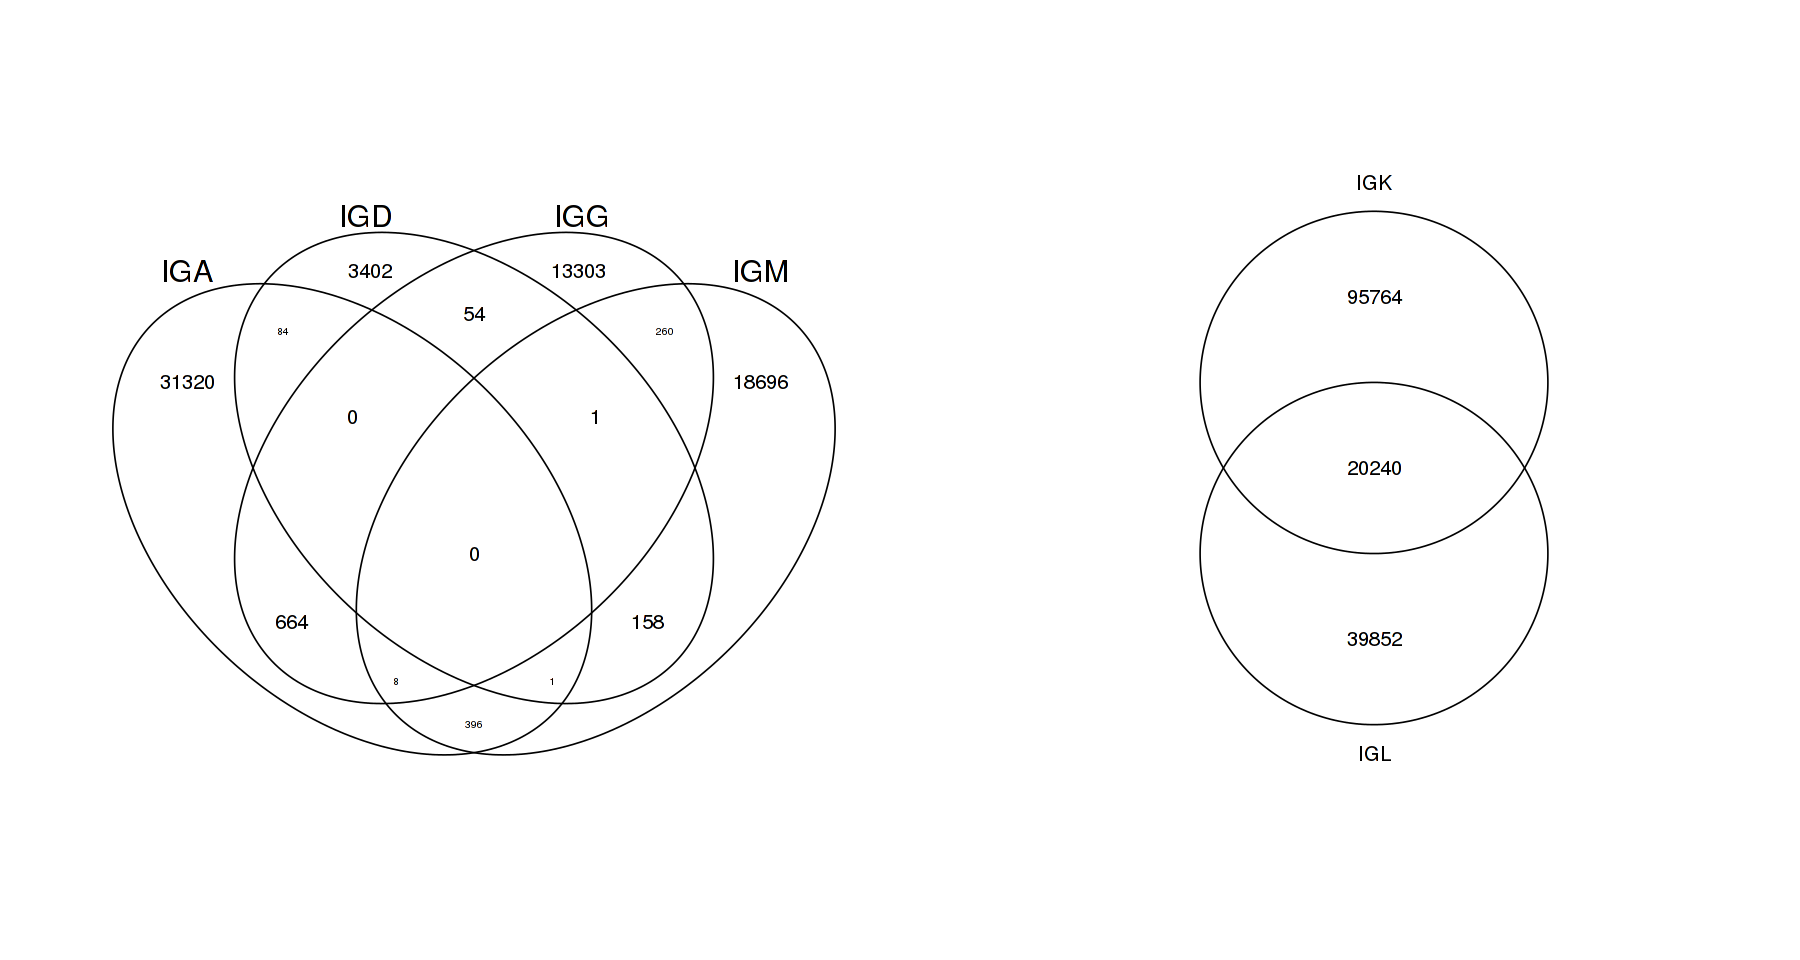

In [47]:
options(repr.plot.width=15, repr.plot.height=8)
par(mfrow=c(1,2))
venn(list(IGA=IGApos,IGD=IGDpos,IGG=IGGpos,IGM=IGMpos),small=0.5)
venn(list(IGL=IGLpos,IGK=IGKpos),small=0.5)

In [12]:
table(BCR_productive$c_gene)


 IGHA1  IGHA2   IGHD   IGHE  IGHG1  IGHG2  IGHG3  IGHG4   IGHM   IGKC  IGLC1 
 27809  24778   4043      2  70179   3282   2649     61  22172 307929  18768 
 IGLC2  IGLC3  IGLC7 
 95613  14349    145 

In [ ]:
ABpos=productive_cellnames[rowSums(ABDG_distribution_productive[,1:2])>0]
DGpos=productive_cellnames[rowSums(ABDG_distribution_productive[,3:4])>0]
abTcells=setdiff(ABpos,DGpos)
gdTcells=setdiff(DGpos,ABpos)
abgdTcells=intersect(DGpos,ABpos)

In [56]:
table(TCR_cellVSchain[,2],TCR_cellVSchain[,3])
table(TCR_cellVSchain[,5],TCR_cellVSchain[,4])

   
        0     1     2     3     4     5     6     7     8     9    10
  0  2221 24138  8484  1844   414    99    20     5     2     1     0
  1  4174 58357 27496  6423  1267   290    52    22     8     1     0
  2   802 13243  8971  3539  1169   319    83    19     2     2     0
  3    99   994  1463  1084   533   187    60    18     4     1     0
  4    14   151   266   257   170    80    30     7     1     4     1
  5     1    20    50    45    32    29    13     4     4     0     1
  6     1     6     4     8     8     3     5     4     1     0     1
  7     0     0     0     2     3     0     2     2     1     0     1
  8     0     0     1     0     1     0     0     1     0     1     0

   
         0      1
  0 167903    213
  1   1007      9
  2     13      1

In [62]:
tmp=table(TCR_all$chain,TCR_all$productive,useNA="ifany")
colnames(tmp)=c("non-productive","productive","NA")
tmp

       
        non-productive productive     NA
  Multi           1410       1947 174572
  TRA            22255     144137 124829
  TRB            13725     174576 210683
  TRD               29          1   4155
  TRG               47          2   9563

In [5]:
table(TCR_annoation_functional$chain)
table(TCR_annoation$chain)+table(TCR_annoation_w$chain)-table(TCR_annoation_functional$chain)



 Multi    TRA    TRB    TRD    TRG 
  3008 151958 168544      1      2 


 Multi    TRA    TRB    TRD    TRG 
174921 139263 230440   4184   9610 

In [23]:
TCA=TCR_all[TCR_all$chain=="TRA",]
TCB=TCR_all[TCR_all$chain=="TRB",]
TCG=TCR_all[TCR_all$chain=="TRG",]
TCD=TCR_all[TCR_all$chain=="TRD",]

In [28]:
tmp=table(TCA$full_length,TCA$high_confidence)
rownames(tmp)=c("partial_length","full_length")
colnames(tmp)=c("low_confidence","high_confidence")
message("TCA:")
tmp

tmp=table(TCB$full_length,TCB$high_confidence)
rownames(tmp)=c("partial_length","full_length")
colnames(tmp)=c("low_confidence","high_confidence")
message("TCB:")
tmp

tmp=table(TCG$full_length,TCG$high_confidence)
rownames(tmp)=c("partial_length","full_length")
colnames(tmp)=c("low_confidence","high_confidence")
message("TCG:")
tmp

tmp=table(TCD$full_length,TCD$high_confidence)
rownames(tmp)=c("partial_length","full_length")
colnames(tmp)=c("low_confidence","high_confidence")
message("TCD:")
tmp


TCA:


                
                 low_confidence high_confidence
  partial_length          80492           31001
  full_length             26855          152873

TCB:


                
                 low_confidence high_confidence
  partial_length         145705           60011
  full_length             23511          169757

TCG:


                
                 low_confidence high_confidence
  partial_length           1373            8237
  full_length                 0               2

TCD:


                
                 low_confidence high_confidence
  partial_length            266            3918
  full_length                 0               1

In [32]:

sum(is.na(TCD$c_gene))
sum(!is.na(TCD$c_gene))

sum(is.na(TCG$c_gene))
sum(!is.na(TCG$c_gene))

[1] 4132

[1] 53

[1] 9562

[1] 50

In [3]:
BCR_all=rbind(BCR_annoation,BCR_annoation_w)
BCR_all=BCR_all[!is.na(BCR_all$chain),]

In [5]:
fwrite(BCR_all,file="BCR_annoation.csv",sep=",",col.names = T,row.names = F,quote = F)

In [35]:
table(BCR_all$chain)


   IGH    IGK    IGL  Multi 
349153 629337 324000  65283 

In [5]:
IGH=BCR_all[BCR_all$chain=="IGH",]
IGK=BCR_all[BCR_all$chain=="IGK",]
IGL=BCR_all[BCR_all$chain=="IGL",]

In [39]:
tmp=table(IGH$full_length,IGH$high_confidence)
rownames(tmp)=c("partial_length","full_length")
colnames(tmp)=c("low_confidence","high_confidence")
message("IGH:")
tmp

tmp=table(IGK$full_length,IGK$high_confidence)
rownames(tmp)=c("partial_length","full_length")
colnames(tmp)=c("low_confidence","high_confidence")
message("IGK:")
tmp

tmp=table(IGL$full_length,IGL$high_confidence)
rownames(tmp)=c("partial_length","full_length")
colnames(tmp)=c("low_confidence","high_confidence")
message("IGL:")
tmp


IGH:


                
                 low_confidence high_confidence
  partial_length          62551          118622
  full_length             43207          124773

IGK:


                
                 low_confidence high_confidence
  partial_length         144556          138038
  full_length            154402          192341

IGL:


                
                 low_confidence high_confidence
  partial_length          68552          109487
  full_length             38989          106972

In [47]:
round(sum(is.na(BCR_all$v_gene))/nrow(BCR_all),4)
round(sum(is.na(BCR_all$d_gene))/nrow(BCR_all),4)
round(sum(is.na(BCR_all$j_gene))/nrow(BCR_all),4)
round(sum(is.na(BCR_all$c_gene))/nrow(BCR_all),4)


round(sum(is.na(TCR_all$v_gene))/nrow(TCR_all),4)
round(sum(is.na(TCR_all$d_gene))/nrow(TCR_all),4)
round(sum(is.na(TCR_all$j_gene))/nrow(TCR_all),4)
round(sum(is.na(TCR_all$c_gene))/nrow(TCR_all),4)

[1] 0.3934

[1] 0.8433

[1] 0.3618

[1] 1e-04

[1] 0.3018

[1] 0.7325

[1] 0.2889

[1] 9e-04

In [7]:
round(sum(is.na(IGH$v_gene))/nrow(IGH),4)
round(sum(is.na(IGH$d_gene))/nrow(IGH),4)
round(sum(is.na(IGH$j_gene))/nrow(IGH),4)
round(sum(is.na(IGH$c_gene))/nrow(IGH),4)

[1] 2e-04

[1] 0.3882

[1] 0.3823

[1] 0.3909

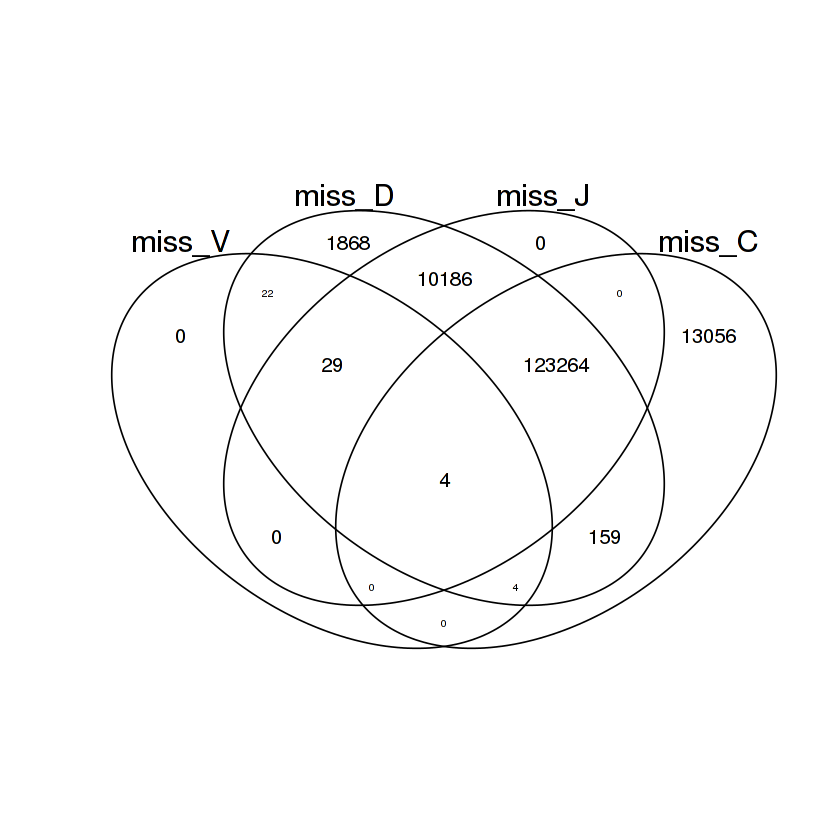

In [9]:
venn(list(miss_V=which(is.na(IGH$v_gene)),
          miss_D=which(is.na(IGH$d_gene)),
          miss_J=which(is.na(IGH$j_gene)),
          miss_C=which(is.na(IGH$c_gene))),small=0.5)

In [49]:
round(sum(is.na(IGH$v_gene))/nrow(IGH),4)
round(sum(is.na(IGH$d_gene))/nrow(IGH),4)
round(sum(is.na(IGH$j_gene))/nrow(IGH),4)
round(sum(is.na(IGH$c_gene))/nrow(IGH),4)

round(sum(is.na(IGK$v_gene))/nrow(IGK),4)
round(sum(is.na(IGK$d_gene))/nrow(IGK),4)
round(sum(is.na(IGK$j_gene))/nrow(IGK),4)
round(sum(is.na(IGK$c_gene))/nrow(IGK),4)

round(sum(is.na(IGL$v_gene))/nrow(IGL),4)
round(sum(is.na(IGL$d_gene))/nrow(IGL),4)
round(sum(is.na(IGL$j_gene))/nrow(IGL),4)
round(sum(is.na(IGL$c_gene))/nrow(IGL),4)

[1] 2e-04

[1] 0.3882

[1] 0.3823

[1] 0.3909

[1] 0

[1] 1

[1] 0.3196

[1] 0.3942

[1] 0

[1] 1

[1] 0.4113

[1] 0.4492

# useless effort to save all information

In [51]:
TCR_all=rbind(TCR_annoation,TCR_annoation_w)
TCR_all=TCR_all[!is.na(TCR_all$chain),]
TCR_all=TCR_all[TCR_all$high_confidence,]
TCR_all=TCR_all[!(TCR_all$chain=="Multi"),] #rm multi
TCR_all=TCR_all[-which(!TCR_all$productive),] #rm non productive

#get the productive AB/GD T cells
TCR_productive=TCR_all[TCR_all$productive,]
ABDG_distribution_productive=table(TCR_productive$barcode,TCR_productive$chain)
productive_cellnames=rownames(ABDG_distribution_productive)
ABpos=productive_cellnames[rowSums(ABDG_distribution_productive[,1:2])>0]
DGpos=productive_cellnames[rowSums(ABDG_distribution_productive[,3:4])>0]
abTcells=setdiff(ABpos,DGpos)
gdTcells=setdiff(DGpos,ABpos)
abgdTcells=intersect(DGpos,ABpos)

#get the non-productive AB/GD T cells
TCR_nonproductive=TCR_all[is.na(TCR_all$productive),]
TCR_nonproductive_singleUMI=TCR_nonproductive[TCR_nonproductive$umis==1,] #get the single-read chain out
TCR_nonproductive=data.table(TCR_nonproductive[TCR_nonproductive$umis!=1,])
UMIsum=TCR_nonproductive[,.(umis=sum(umis)),by=c("barcode","chain")]
UMIsum=dcast(UMIsum, barcode ~ chain, value.var = "umis")
UMIsum[is.na(UMIsum)]=0
nonproductive_cellnames=UMIsum$barcode
abTcells_candidate=nonproductive_cellnames[UMIsum$TRA+UMIsum$TRB > 0 & UMIsum$TRD+UMIsum$TRG == 0]
gdTcells_candidate=nonproductive_cellnames[UMIsum$TRA+UMIsum$TRB == 0 & UMIsum$TRD+UMIsum$TRG > 0]
abgdTcells_candidate=nonproductive_cellnames[UMIsum$TRA+UMIsum$TRB > 0 & UMIsum$TRD+UMIsum$TRG > 0]

abTcells=c(abTcells,setdiff(abTcells_candidate,productive_cellnames))
gdTcells=c(gdTcells,setdiff(gdTcells_candidate,productive_cellnames))
abgdTcells=c(abgdTcells,setdiff(abgdTcells_candidate,productive_cellnames))

#get the single read non-productive AB/GD T cells
ABDG_distribution_nonproductive=table(TCR_nonproductive_singleUMI$barcode,TCR_nonproductive_singleUMI$chain)
singleReadChain_cellnames=rownames(ABDG_distribution_nonproductive)
ABpos=singleReadChain_cellnames[rowSums(ABDG_distribution_nonproductive[,1:2])>0]
DGpos=singleReadChain_cellnames[rowSums(ABDG_distribution_nonproductive[,3:4])>0]
abTcells_candidate=setdiff(ABpos,DGpos)
gdTcells_candidate=setdiff(DGpos,ABpos)
abgdTcells_candidate=intersect(DGpos,ABpos)

abTcells=c(abTcells,setdiff(abTcells_candidate,union(productive_cellnames,nonproductive_cellnames)))
gdTcells=c(gdTcells,setdiff(gdTcells_candidate,union(productive_cellnames,nonproductive_cellnames)))
abgdTcells=c(abgdTcells,setdiff(abgdTcells_candidate,union(productive_cellnames,nonproductive_cellnames)))